## Libraries

In [1]:
import sys
sys.path.append('../')

In [2]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Objetive

The objective of this notebook is twofold:

> Create a heatmap that we will use to introduce it to our API as an endpoint

> Create some graphs that summarize the data that is in the API

## Loading the data

In [9]:
df = pd.read_csv("../Output/Species_def.csv", sep = ";")
cli = pd.read_csv("../Output/data_cli.csv", sep = ";")

In [24]:
df.head()

,long,lat,locality,province,community,year,month,kingdom,class,family,genus,species,common_name
0,-1.856,37.237,Almeria,Almeria,Andalucia,2012,Oct,Animalia,Reptilia,Colubridae,Hemorrhois,Hemorrhois hippocrepis,Horseshoe Whip Snake
1,-2.256,36.797,Almeria,Almeria,Andalucia,2013,Apr,Animalia,Reptilia,Chamaeleonidae,Chamaeleo,Chamaeleo chamaeleon,Common Chameleon
2,-2.294,36.835,Almeria,Almeria,Andalucia,2017,Oct,Animalia,Reptilia,Chamaeleonidae,Chamaeleo,Chamaeleo chamaeleon,Common Chameleon
3,-2.286,36.820,Almeria,Almeria,Andalucia,2017,Oct,Animalia,Reptilia,Chamaeleonidae,Chamaeleo,Chamaeleo chamaeleon,Common Chameleon
4,-2.224,36.763,Almeria,Almeria,Andalucia,2017,Aug,Animalia,Reptilia,Chamaeleonidae,Chamaeleo,Chamaeleo chamaeleon,Common Chameleon


## Create a HeatMap

In [ ]:
#coordenadas de Puerta del Sol
inicial_lat = 40.4146500
initial_long = -3.7004000

In [ ]:
map_1 = folium.Map(location = [inicial_lat, initial_long], tiles='Stamen Terrain',  zoom_start = 6)
map_1

In [ ]:
df_2001 = df[(df.year == 2010)]

In [ ]:
df["class"].unique()

In [ ]:
for i,row in df_2001.iterrows():
    #popup distrito
    province = {
    "location" : [row["lat"],row["long"]],
    "tooltip" : row["locality"]
    }
    if row["class"] == "Aves":
        icon = Icon(color = "green",
        prefix = "fa",
        icon = "glass",
        icon_color = "black"
        )
                    
    elif row["class"] == "Amphibia":
        icon = Icon(color = "blue",
        prefix = "fa",
        icon = "glass",
        icon_color = "black"
        )
                    
    elif row["class"] == "Reptilia":
        icon = Icon(color = "red",
        prefix = "fa",
        icon = "glass",
        icon_color = "black"
        )
                    
    else: 
        icon = Icon(color = "orange",
        prefix = "fa",
        icon = "glass",
        icon_color = "black"
        )
    Marker(**province, icon = icon).add_to(map_1)

In [ ]:
map_1

In [ ]:
map_2 = folium.Map(location = [inicial_lat, initial_long], tiles='CartoDB dark_matter',  zoom_start = 6)

In [ ]:
map_2

In [ ]:
#PARA REPTILES
reptiles = df[df["class"]== "Reptilia"]
#creamos Feature Group (mirad la doc) nombramos "mañana"
reptiles_group = folium.FeatureGroup(name = "Reptilia")
#Añadimos el mapa de calor al group
HeatMap(data=reptiles[["lat","long"]],radius=15).add_to(reptiles_group)
reptiles_group.add_to(map_2)

In [ ]:
#PARA AVES
aves = df[df["class"]== "Aves"]
#creamos Feature Group (mirad la doc) nombramos "mañana"
aves_group = folium.FeatureGroup(name = "Aves")
#Añadimos el mapa de calor al group
HeatMap(data=aves[["lat","long"]],radius=15).add_to(aves_group)
aves_group.add_to(map_2)

In [ ]:
#PARA MAMIFEROS
mam = df[df["class"]== "Mammals"]
#creamos Feature Group (mirad la doc) nombramos "mañana"
mammals_group = folium.FeatureGroup(name = "Mammals")
#Añadimos el mapa de calor al group
HeatMap(data=mam[["lat","long"]],radius=15).add_to(mammals_group)
mammals_group.add_to(map_2)

In [ ]:
#PARA AMFIBIOS
amph = df[df["class"]== "Amphibia"]
#creamos Feature Group (mirad la doc) nombramos "mañana"
amp_group = folium.FeatureGroup(name = "Amphibia")
#Añadimos el mapa de calor al group
HeatMap(data=amph[["lat","long"]],radius=15).add_to(amp_group)
amp_group.add_to(map_2)

In [ ]:
folium.LayerControl(collapsed=False).add_to(map_2)

In [ ]:
map_2

## Creating some Figures

In [4]:
df['Count'] = df.groupby(['species'])['year'].transform('count')

In [5]:
df["class"].unique()

array(['Reptilia', 'Aves', 'Mammalia', 'Amphibia', 'Actinopterygii'],
      dtype=object)

In [ ]:
list1 =  df[df["class"]== "Aves"]
list2 = df[df["class"]== "Mammalia"]
list3 =  df[df["class"]== "Amphibia"]
list4 = df[df["class"]== "Reptilia"]

fig, ax = plt.subplots(1,4, figsize = (15,5))
ax[0].hist(list1["year"], alpha = 1, color = 'seagreen', edgecolor = 'black')
ax[1].hist(list2["year"], alpha = 1, color = 'olivedrab', edgecolor = 'black')
ax[2].hist(list3["year"], alpha = 1, color = 'olive', edgecolor = 'black')
ax[3].hist(list4["year"], alpha = 1, color = 'forestgreen', edgecolor = 'black')

ax[0].title.set_text('Aves')
ax[1].title.set_text('Mammalia')
ax[2].title.set_text('Amphibia')
ax[3].title.set_text('Reptilia')

plt.suptitle('Number of species for each class across years')
plt.show()
fig.savefig("species_class.png")

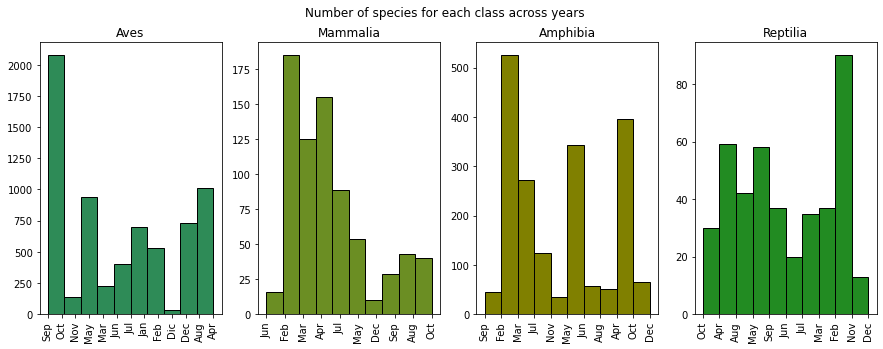

In [11]:
list1 =  df[df["class"]== "Aves"]
list2 = df[df["class"]== "Mammalia"]
list3 =  df[df["class"]== "Amphibia"]
list4 = df[df["class"]== "Reptilia"]
list1 = list1.sort_values('month', ascending = False).reset_index(drop=True)


fig, ax = plt.subplots(1,4, figsize = (15,5))
ax[0].hist(list1["month"], alpha = 1, color = 'seagreen', edgecolor = 'black')
ax[1].hist(list2["month"], alpha = 1, color = 'olivedrab', edgecolor = 'black')
ax[2].hist(list3["month"], alpha = 1, color = 'olive', edgecolor = 'black')
ax[3].hist(list4["month"], alpha = 1, color = 'forestgreen', edgecolor = 'black')

ax[0].title.set_text('Aves')
ax[1].title.set_text('Mammalia')
ax[2].title.set_text('Amphibia')
ax[3].title.set_text('Reptilia')

ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
ax[3].tick_params(axis='x', rotation=90)

plt.suptitle('Number of species for each class across years')
plt.show()
fig.savefig("species_month.png")

TypeError: 'value' must be an instance of str or bytes, not a float

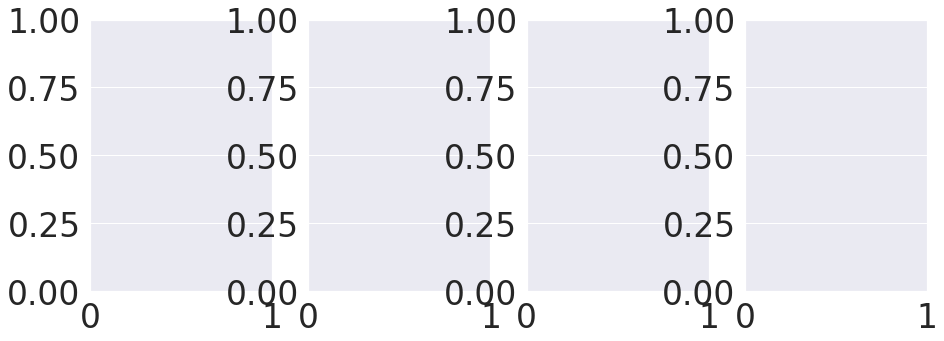

In [23]:
list1 =  df[df["class"]== "Aves"]
list2 = df[df["class"]== "Mammalia"]
list3 =  df[df["class"]== "Amphibia"]
list4 = df[df["class"]== "Reptilia"]



fig, ax = plt.subplots(1,4, figsize = (15,5))
ax[0].hist(list1["community"], alpha = 1, color = 'seagreen', edgecolor = 'black')
ax[1].hist(list2["month"], alpha = 1, color = 'olivedrab', edgecolor = 'black')
ax[2].hist(list3["month"], alpha = 1, color = 'olive', edgecolor = 'black')
ax[3].hist(list4["month"], alpha = 1, color = 'forestgreen', edgecolor = 'black')

ax[0].title.set_text('Aves')
ax[1].title.set_text('Mammalia')
ax[2].title.set_text('Amphibia')
ax[3].title.set_text('Reptilia')

ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
ax[3].tick_params(axis='x', rotation=90)

plt.suptitle('Number of species for each class across years')
plt.show()
fig.savefig("species_month.png")

## Figure climate 

In [14]:
cli = cli.groupby('community', as_index=False)['min_temp', 'max_temp', 'elevation', 'isothermality', 'mean_temp', 'precip', 'seasonal_temp'].mean()

<ipython-input-14-af2c06503d95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cli = cli.groupby('community', as_index=False)['min_temp', 'max_temp', 'elevation', 'isothermality', 'mean_temp', 'precip', 'seasonal_temp'].mean()


In [15]:
cli.head()

,community,min_temp,max_temp,elevation,isothermality,mean_temp,precip,seasonal_temp
0,Algarve,6.831667,29.341667,168.000000,43.000000,16.618333,70.476667,450.486667
1,Andalucia,3.522201,32.681694,469.798442,41.498832,15.922006,60.162025,603.885784
2,Aragon,-0.739964,29.081172,827.101243,39.299112,11.883126,28.455240,646.578153
3,Asturias,2.573077,25.332692,565.346154,40.632692,12.430769,50.832692,489.126923
4,Castilla y Leon,-0.689243,27.802086,932.570801,38.952689,11.116795,35.545774,620.490889


In [16]:
cli["community"].unique()

array(['Algarve', 'Andalucia', 'Aragon', 'Asturias', 'Castilla y Leon',
       'Castilla-La Mancha', 'Cataluna', 'Comunidad de Madrid',
       'Comunitat Valenciana', 'Euskadi', 'Extremadura', 'Galicia',
       'Illes Balears', 'Islas Canarias', 'La Rioja', 'Murcia',
       'Navarra - Nafarroa', 'Norte', 'Otras', 'Portugal'], dtype=object)

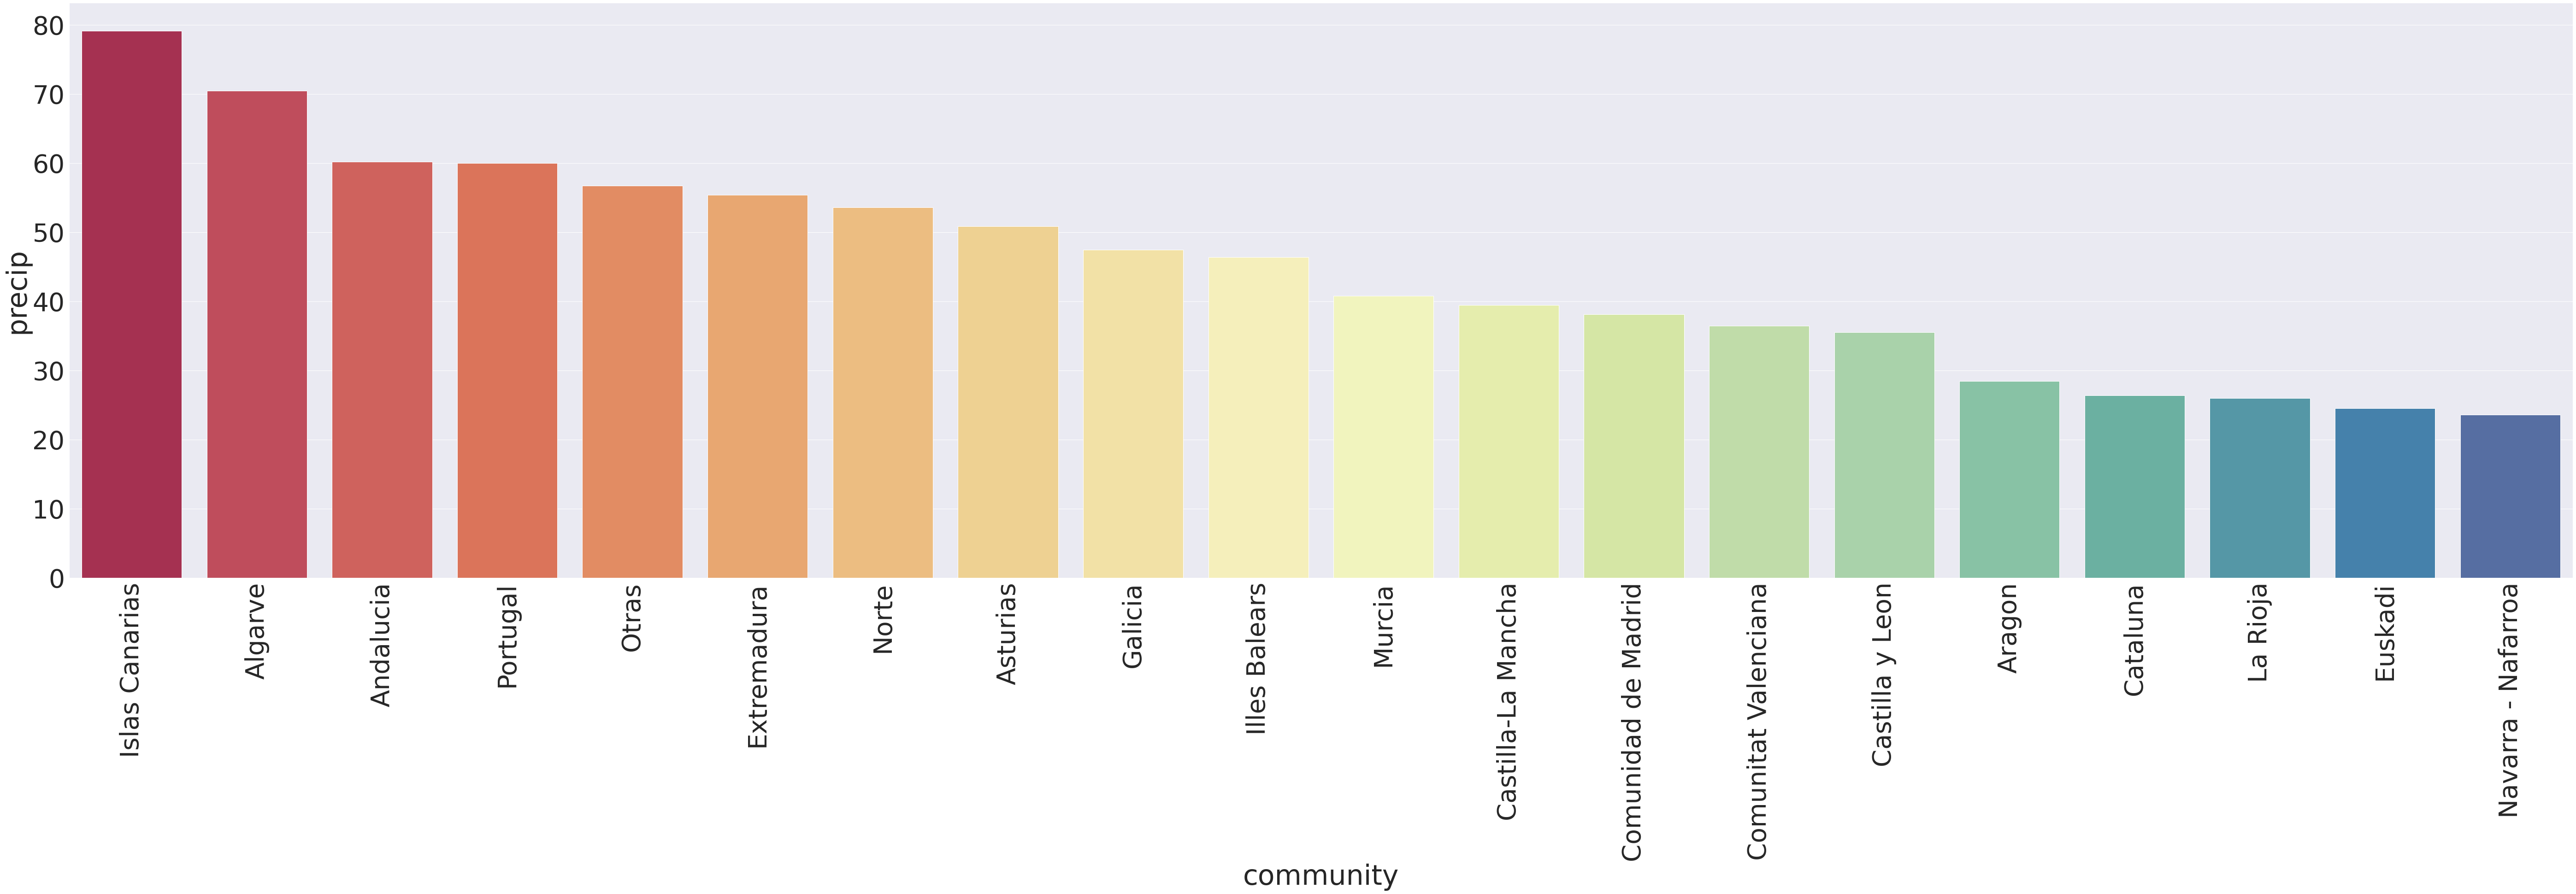

In [42]:
sns.set(font_scale = 5)
plot_order = cli.groupby('community')['precip'].sum().sort_values(ascending=False).index.values
plot = sns.catplot(x="community", y="precip", kind="bar", palette="Spectral", data=cli, order = plot_order, height=20, aspect=4)
plot.set_xticklabels(rotation=90)
plot.savefig("precip.png")
